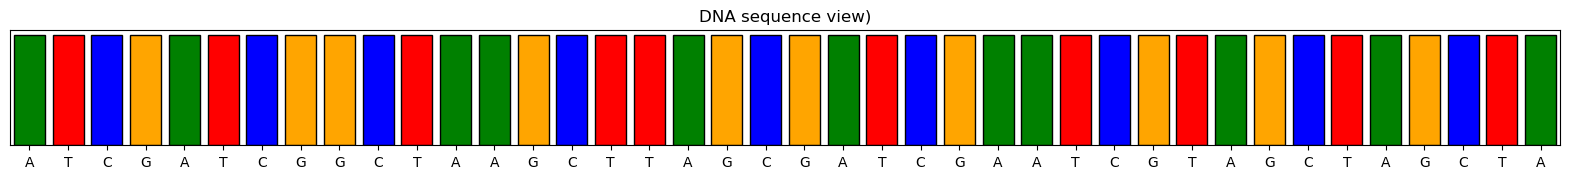

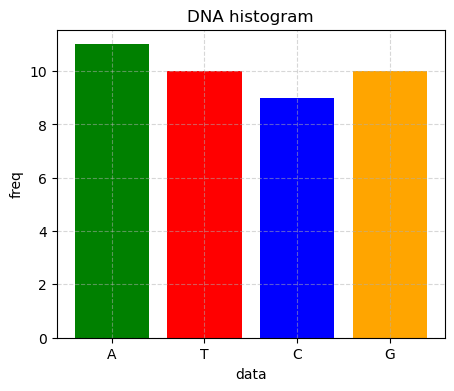

In [1]:
import matplotlib.pyplot as plt
from collections import Counter

# 예시 염기서열 (실제로는 수천~수백만 염기)
sequence = "ATCGATCGGCTAAGCTTAGCGATCGAATCGTAGCTAGCTA"

# 1. 염기 위치별 색 막대 시각화
def plot_base_sequence(seq):
    color_map = {'A': 'green', 'T': 'red', 'C': 'blue', 'G': 'orange'}
    fig, ax = plt.subplots(figsize=(len(seq) // 2, 1.5))
    
    for i, base in enumerate(seq):
        ax.bar(i, 1, color=color_map.get(base, 'gray'), edgecolor='black')
    
    ax.set_xticks(range(len(seq)))
    ax.set_xticklabels(seq)
    ax.set_yticks([])
    ax.set_xlim(-0.5, len(seq)-0.5)
    ax.set_title("DNA sequence view)")
    plt.show()

# 2. 염기 빈도수 히스토그램
def plot_base_histogram(seq):
    counter = Counter(seq)
    bases = ['A', 'T', 'C', 'G']
    counts = [counter.get(b, 0) for b in bases]
    
    plt.figure(figsize=(5, 4))
    plt.bar(bases, counts, color=['green', 'red', 'blue', 'orange'])
    plt.title("DNA histogram")
    plt.ylabel("freq")
    plt.xlabel("data")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()

# 실행
plot_base_sequence(sequence)
plot_base_histogram(sequence)


In [2]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from collections import Counter
import matplotlib.pyplot as plt

# 1. 염기서열 문자열 정의 및 Seq 객체 생성
sequence_str = "ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG"
seq = Seq(sequence_str)

# 2. SeqRecord로 생물학적 메타데이터 포함
record = SeqRecord(seq, id="test_gene", description="Synthetic coding sequence")

# 3. Biopython 기능 활용 결과 출력
print(f"🧬 Original DNA : {record.seq}")
print(f"🧬 Complement    : {record.seq.complement()}")
print(f"🧬 Rev. Complement: {record.seq.reverse_complement()}")
print(f"🧬 RNA (transcribe): {record.seq.transcribe()}")
print(f"🧬 Protein (translate): {record.seq.translate(to_stop=True)}")

# 4. 함수: 염기 빈도 시각화
def plot_nucleotide_frequency(seq):
    counter = Counter(seq.upper())
    bases = ['A', 'T', 'C', 'G']
    counts = [counter.get(base, 0) for base in bases]

    plt.figure(figsize=(5, 4))
    plt.bar(bases, counts, color=['green', 'red', 'blue', 'orange'])
    plt.title("Nucleotide Frequency")
    plt.xlabel("Base")
    plt.ylabel("Count")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# 5. 함수: 코돈별 아미노산 시각화
def plot_codon_translation(seq):
    codons = [str(seq[i:i+3]) for i in range(0, len(seq) - 2, 3)]
    proteins = [str(Seq(c).translate()) for c in codons]

    plt.figure(figsize=(len(codons), 1.5))
    for i, (codon, aa) in enumerate(zip(codons, proteins)):
        plt.text(i, 0.5, f"{codon}\n{aa}", ha='center', va='center', fontsize=10,
                 bbox=dict(facecolor='lightblue', edgecolor='gray'))
    plt.xticks([])
    plt.yticks([])
    plt.title("Codon-to-Amino Acid Mapping")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# 6. 실행
plot_nucleotide_frequency(str(record.seq))
plot_codon_translation(record.seq)


ModuleNotFoundError: No module named 'Bio'